# House Price Preddiction using Multiple Linear Regression

In [1]:
# import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import data

In [4]:
df=pd.read_csv(r"C:\Users\SURAJ\Desktop\jupyter\projects\linear regression\House Data.csv")

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# data analysis

In [7]:
df.shape

(21613, 21)

In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
round(df.describe().T),2

(                 count          mean           std        min           25%  \
 id             21613.0  4.580302e+09  2.876566e+09  1000102.0  2.123049e+09   
 price          21613.0  5.400880e+05  3.671270e+05    75000.0  3.219500e+05   
 bedrooms       21613.0  3.000000e+00  1.000000e+00        0.0  3.000000e+00   
 bathrooms      21613.0  2.000000e+00  1.000000e+00        0.0  2.000000e+00   
 sqft_living    21613.0  2.080000e+03  9.180000e+02      290.0  1.427000e+03   
 sqft_lot       21613.0  1.510700e+04  4.142100e+04      520.0  5.040000e+03   
 floors         21613.0  1.000000e+00  1.000000e+00        1.0  1.000000e+00   
 waterfront     21613.0  0.000000e+00  0.000000e+00        0.0  0.000000e+00   
 view           21613.0  0.000000e+00  1.000000e+00        0.0  0.000000e+00   
 condition      21613.0  3.000000e+00  1.000000e+00        1.0  3.000000e+00   
 grade          21613.0  8.000000e+00  1.000000e+00        1.0  7.000000e+00   
 sqft_above     21613.0  1.788000e+03  8

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [12]:
# in date column the data type is in object form we have to convert it into date time format

In [13]:
# converting data column in date time format
df["date"]=pd.to_datetime(df['date'])

In [14]:
df['date'].dtypes

dtype('<M8[ns]')

In [15]:
# extracting year and month from the date column
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month

In [16]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [18]:
# drop unneccessary column from data
df.drop(columns=['id','date'],inplace=True,axis=1)

In [19]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


# feature classification

1) price is a target variable
2) bedrooms, bathrooms, floors, waterfront, view, condition, grade are the house conditions features
3) yr_built, yr_renovated, year, month are the year based feature of the house
4) sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 are the features of areas of the house
5) zipcode, lat, long are the location based feature

# Merging Latitude and Longitude columns
1) latitude and longitude both are related to each other, each of them contain 50% information about location.

2) separately both are not that much usefull, but when we use them as a one column they will give us more information about location.

3) To merge lat and long columns we are using Haversine Formula(Use to get shortest distance between two different co-ordinates).

<AxesSubplot: xlabel='zipcode'>

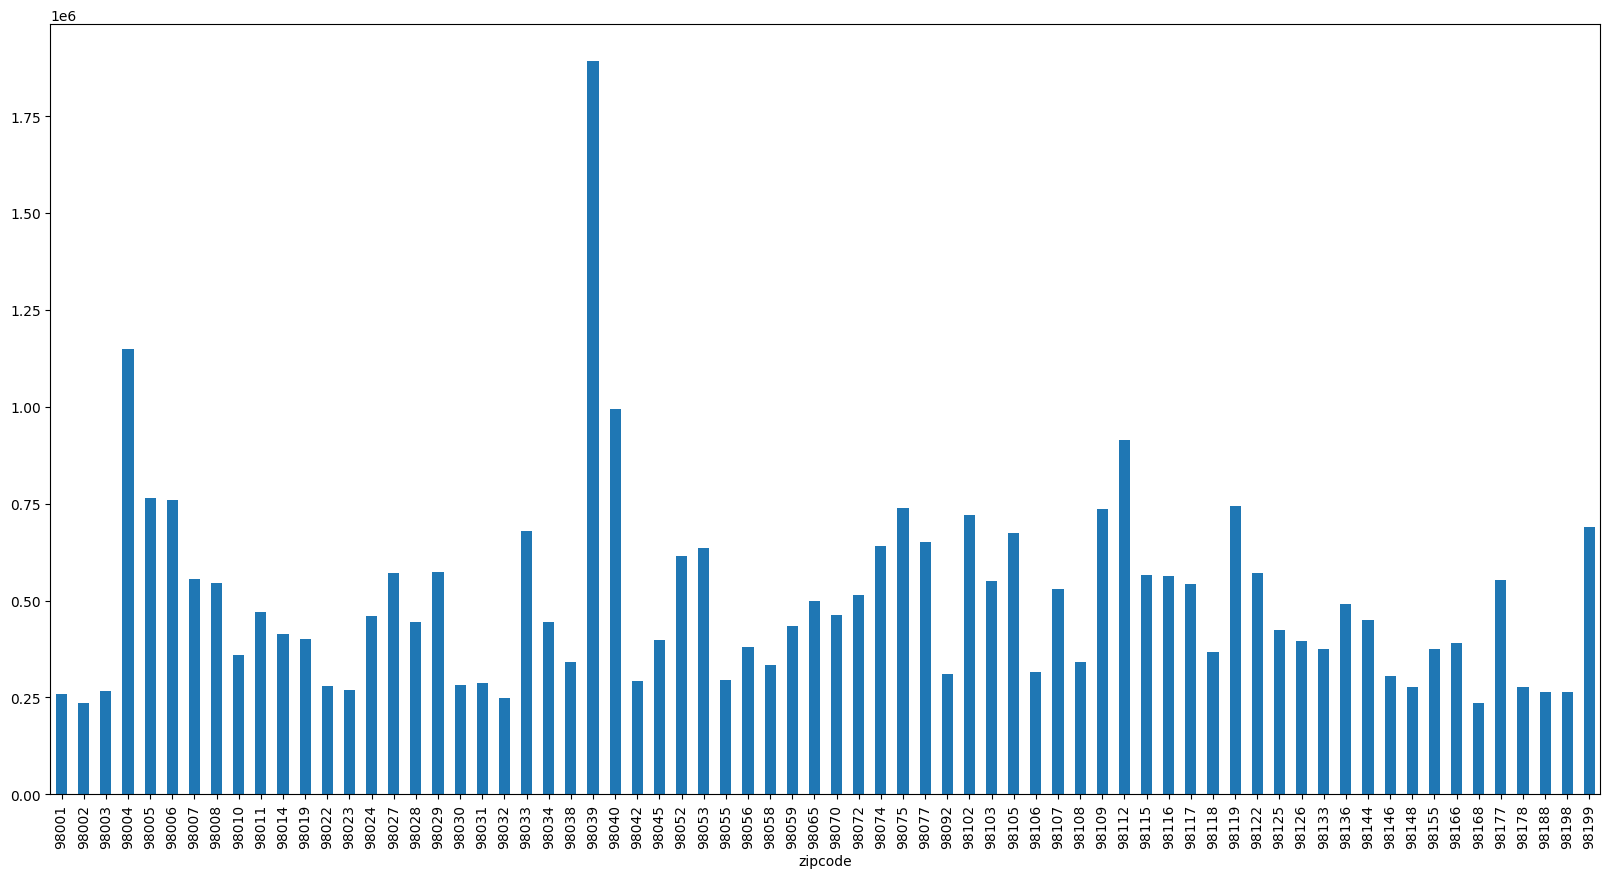

In [20]:
plt.figure(figsize=(20,10))
df.groupby("zipcode")['price'].median().plot.bar()

In [21]:
# median of zipcode is 98039, Latitude = 47.6206  &  Longitude = -122.225  
df[df['zipcode']==98039]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
2974,2950000.0,4,3.50,4860,23885,2.0,0,0,3,12,...,0,1996,0,98039,47.6172,-122.230,3580,16054,2014,8
3761,1905000.0,4,3.50,4210,18564,2.0,0,0,3,11,...,0,2001,0,98039,47.6206,-122.225,3520,18564,2015,2
4077,875000.0,3,1.00,1220,8119,1.0,0,0,4,7,...,0,1955,0,98039,47.6328,-122.236,1910,8119,2014,11
4078,940000.0,3,1.00,1220,8119,1.0,0,0,4,7,...,0,1955,0,98039,47.6328,-122.236,1910,8119,2015,2
4149,4000000.0,4,5.50,7080,16573,2.0,0,0,3,12,...,1320,2008,0,98039,47.6151,-122.224,3140,15996,2014,10
4411,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,...,3000,2001,0,98039,47.6289,-122.233,3560,24345,2014,8
4791,937500.0,3,1.00,1320,8500,1.0,0,0,4,7,...,0,1954,0,98039,47.6187,-122.226,2790,10800,2015,3
5178,1160000.0,4,3.00,2680,15438,2.0,0,2,3,8,...,0,1902,1956,98039,47.6109,-122.226,4480,14406,2015,4
5589,1880000.0,3,2.75,2620,17919,1.0,0,1,4,9,...,0,1949,0,98039,47.6144,-122.228,3400,14400,2014,11
5880,3418800.0,5,5.00,5450,20412,2.0,0,0,3,11,...,0,2014,0,98039,47.6209,-122.237,3160,17825,2014,10


In [22]:
#Haversine distance formula
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6378 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [23]:
ll=[]
for i in range(len(df)):
  lat1 = 47.6206
  lon1 = -122.225
  lat2 = df['lat'][i]
  lon2 = df['long'][i]

  distance = haversine(lon1, lat1, lon2, lat2)
  ll.append(distance)

In [24]:
df['haversine_dist']=ll

In [25]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,haversine_dist
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,12.413011
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,13.212016
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,13.071254
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,16.811236
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,13.512839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,12.611522
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,15.985989
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,6.272967
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,15.135800


In [26]:
#now we can drop the unuse coloumn
df.drop(columns=['zipcode','long','lat'],axis=1,inplace=True)

In [27]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,month,haversine_dist
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,2014,10,12.413011
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,2014,12,13.212016
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,2015,2,13.071254
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,2014,12,16.811236
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,2015,2,13.512839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,2014,5,12.611522
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,2015,2,15.985989
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,2014,6,6.272967
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,2015,1,15.135800


In [28]:
#checking skewness
df.skew()

price              4.024069
bedrooms           1.974300
bathrooms          0.511108
sqft_living        1.471555
sqft_lot          13.060019
floors             0.616177
waterfront        11.385108
view               3.395750
condition          1.032805
grade              0.771103
sqft_above         1.446664
sqft_basement      1.577965
yr_built          -0.469805
yr_renovated       4.549493
sqft_living15      1.108181
sqft_lot15         9.506743
year               0.757299
month              0.063130
haversine_dist     1.077210
dtype: float64

In [29]:
#check kurtosis
df.kurtosis()

price              34.585540
bedrooms           49.063653
bathrooms           1.279902
sqft_living         5.243093
sqft_lot          285.077820
floors             -0.484723
waterfront        127.632494
view               10.893022
condition           0.525764
grade               1.190932
sqft_above          3.402304
sqft_basement       2.715574
yr_built           -0.657408
yr_renovated       18.701152
sqft_living15       1.597096
sqft_lot15        150.763110
year               -1.426630
month              -1.007919
haversine_dist      0.846094
dtype: float64

In [30]:
#checking the relations between them

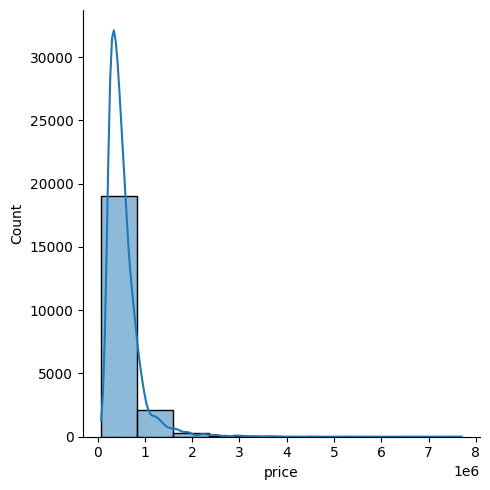

In [31]:
sns.displot(df["price"], bins=10, kde=True)

<AxesSubplot: >

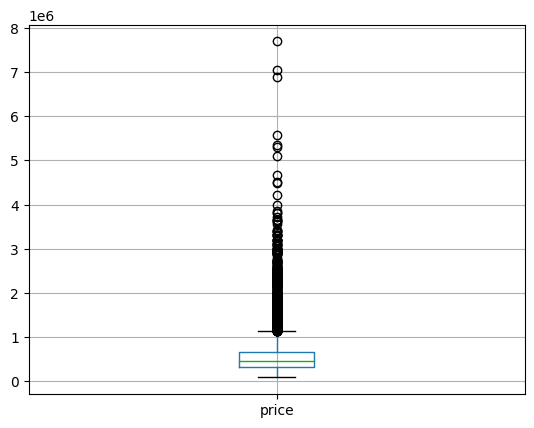

In [32]:
df.boxplot('price')

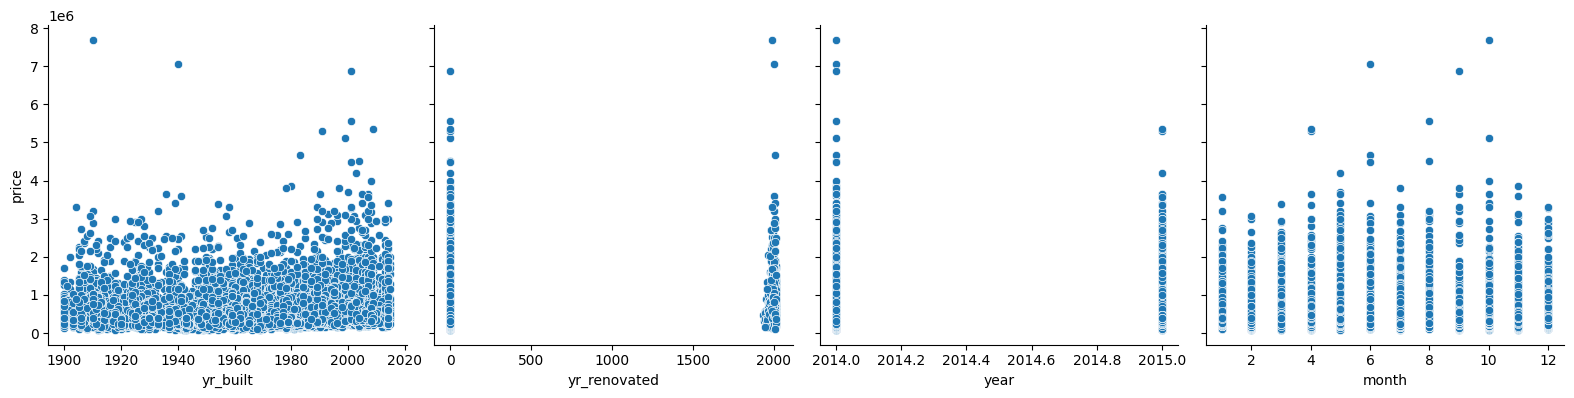

In [33]:
#check relation between year of houses
sns.pairplot(df, x_vars=['yr_built', 'yr_renovated', 'year', 'month'], y_vars='price',size=4)

In [34]:
# from above graph we can conclude that all house are sold in 2014 and 2015

In [35]:
year_features=['yr_built', 'yr_renovated', 'year', 'month']

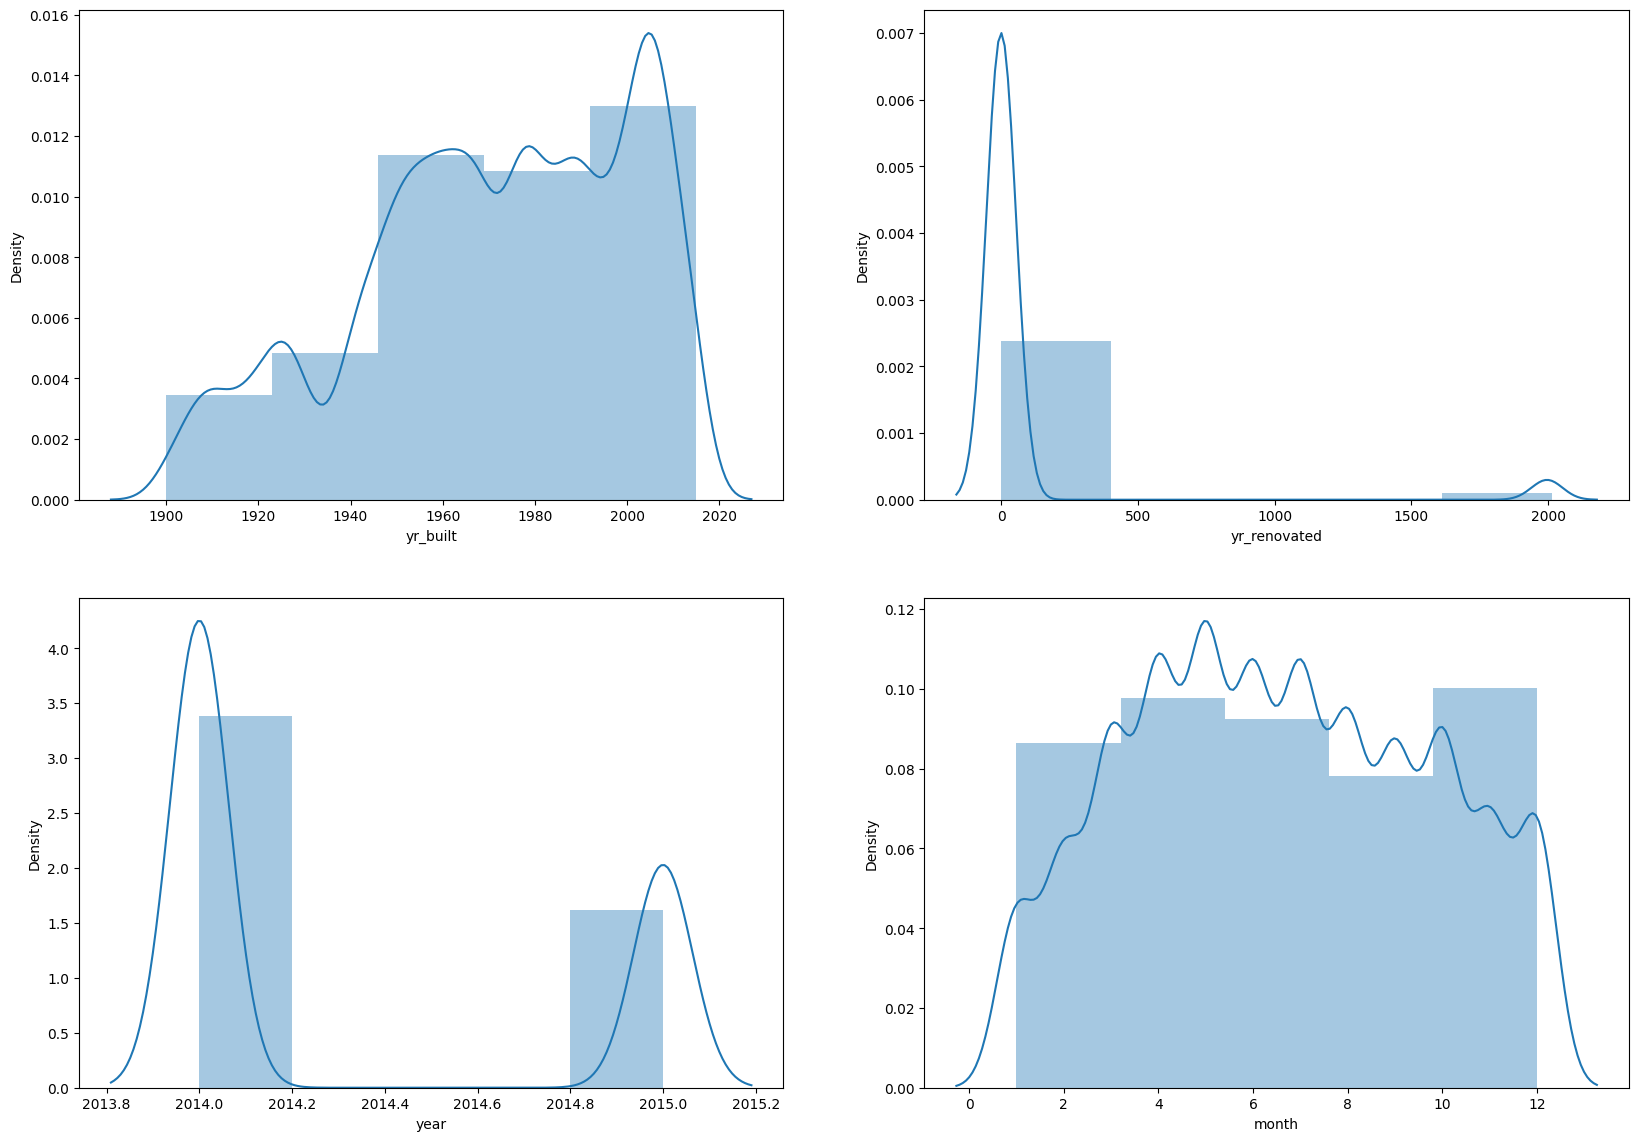

In [36]:
plt.figure(figsize=(20,14))
k=1
for feature in year_features:
  plt.subplot(2,2,k)
  sns.distplot(df[feature], bins=5, kde=True)
  k=k+1

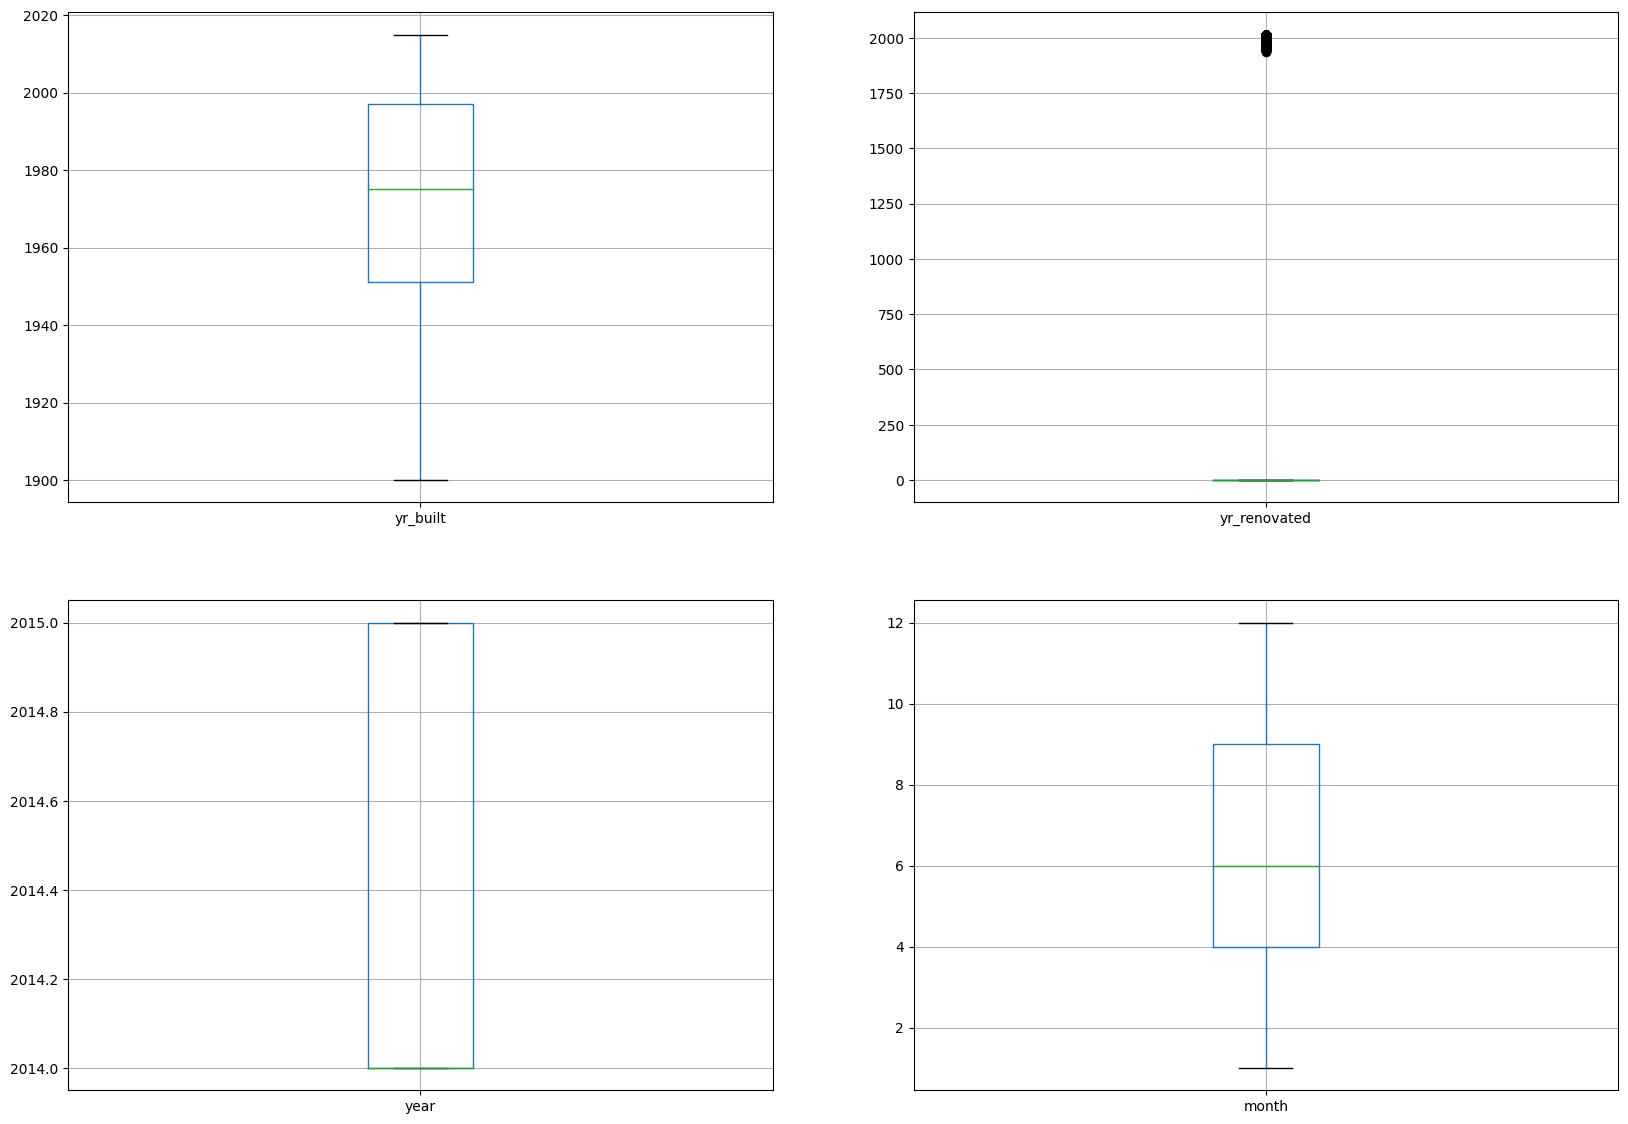

In [37]:
plt.figure(figsize=(20,14))
k=1
for feature in year_features:
  plt.subplot(2,2,k)
  df.boxplot(feature)
  k=k+1

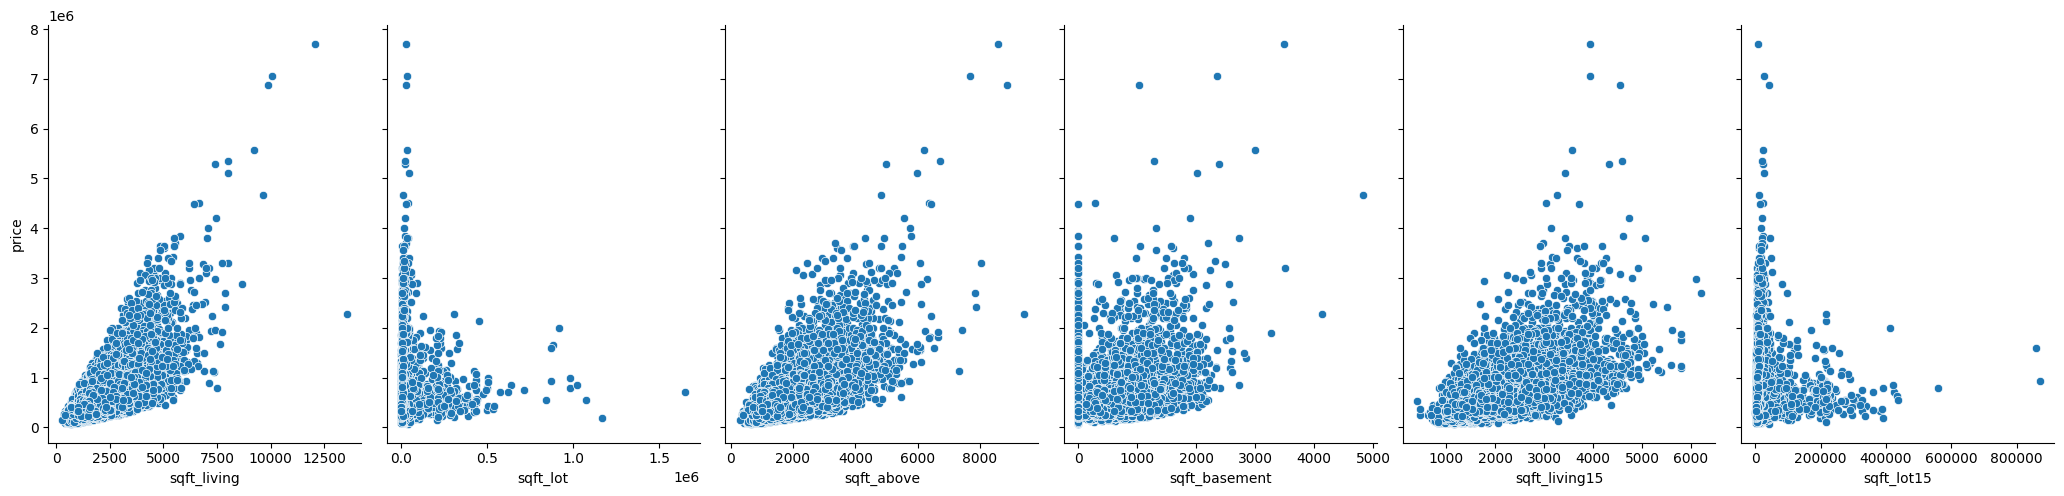

In [38]:
#check relation between sqrt_features
sns.pairplot(df, x_vars=['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15','sqft_lot15'],
             y_vars='price', size=5, aspect=0.7)

In [39]:
sqft_features = ['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15','sqft_lot15']

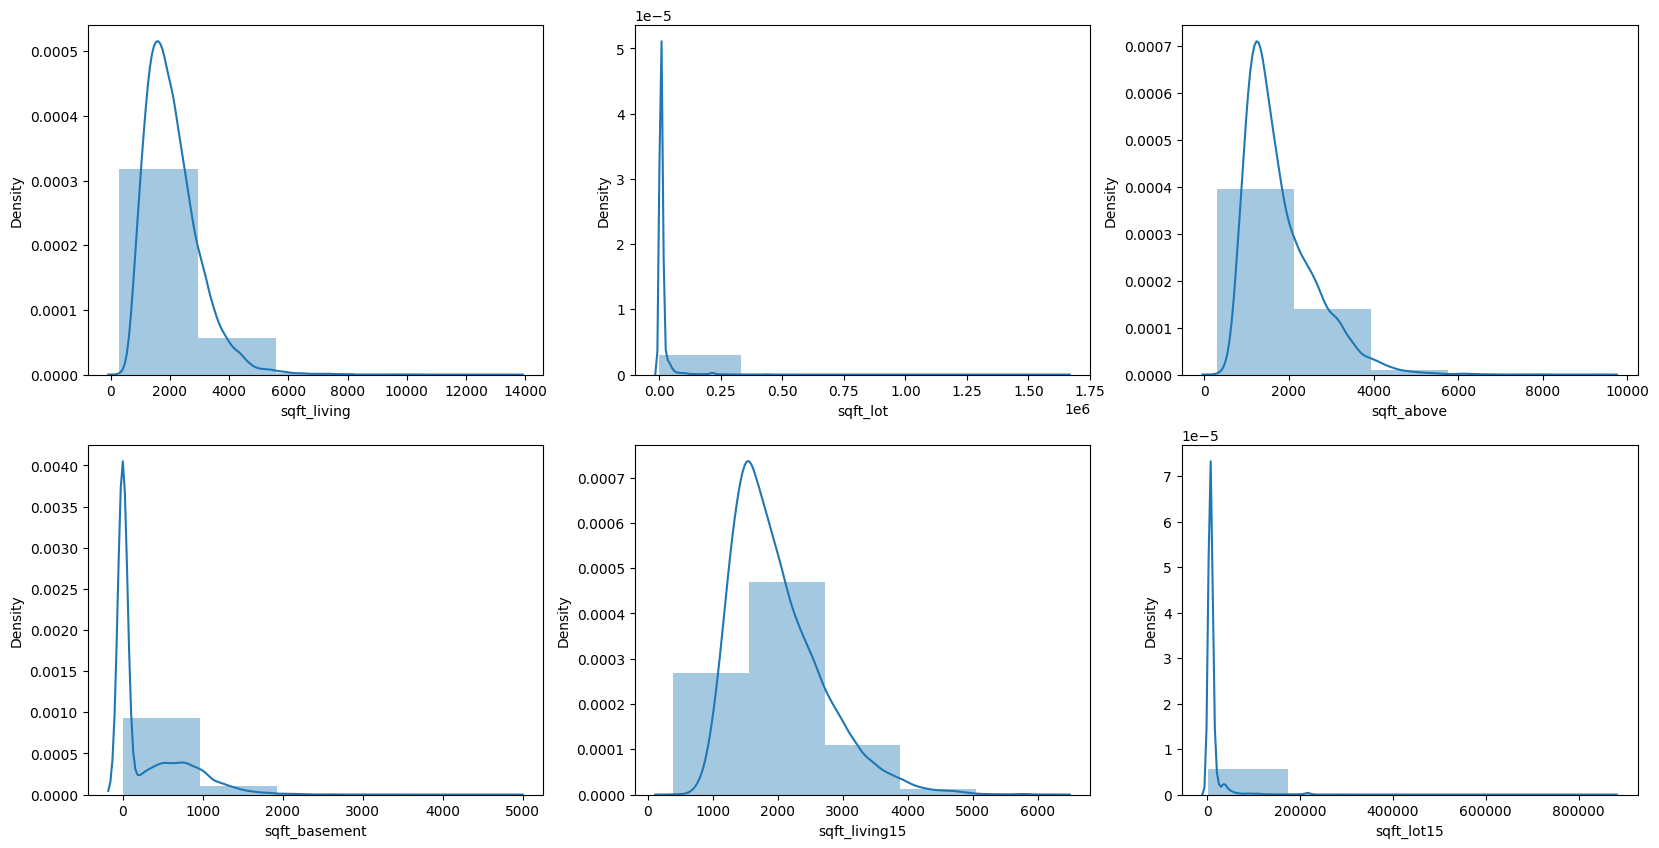

In [40]:
plt.figure(figsize=(20,10))
k=1
for feature in sqft_features:
  plt.subplot(2,3,k)
  sns.distplot(df[feature], bins=5, kde=True)
  k=k+1

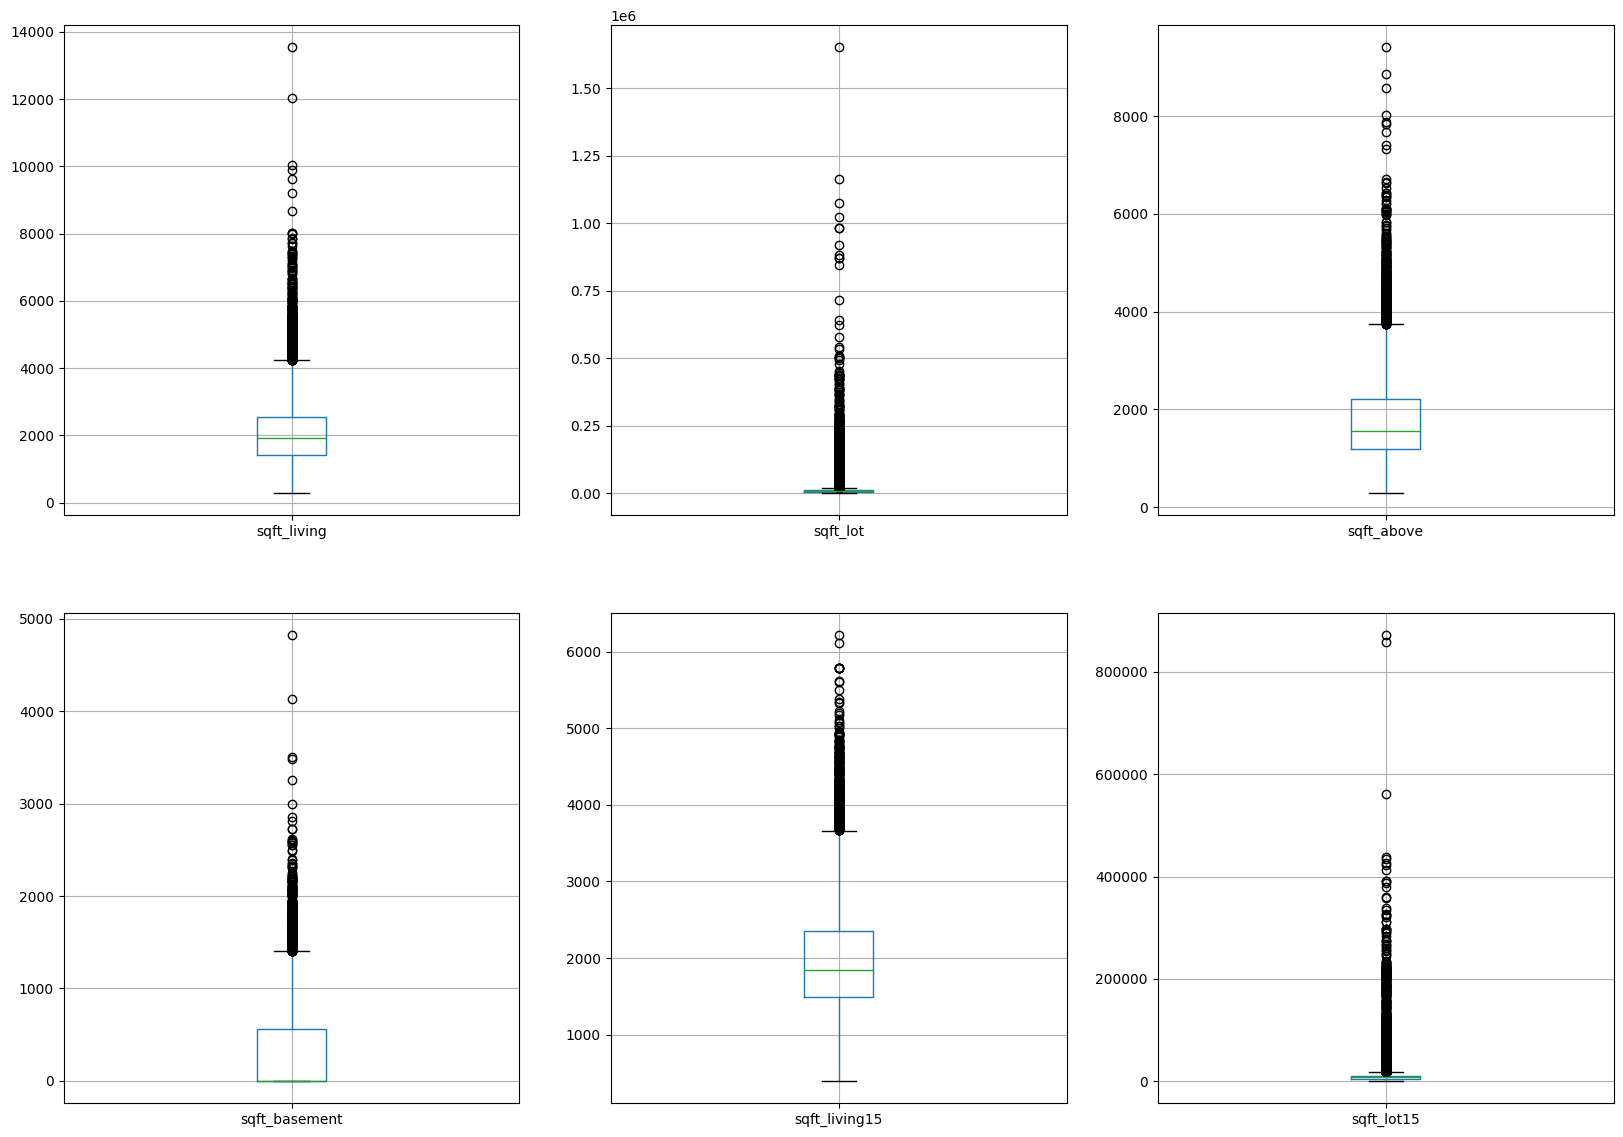

In [41]:
plt.figure(figsize=(20,14))
k=1
for feature in sqft_features:
  plt.subplot(2,3,k)
  df.boxplot(feature)
  k=k+1

In [42]:
#check relation between house_features
house_features = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

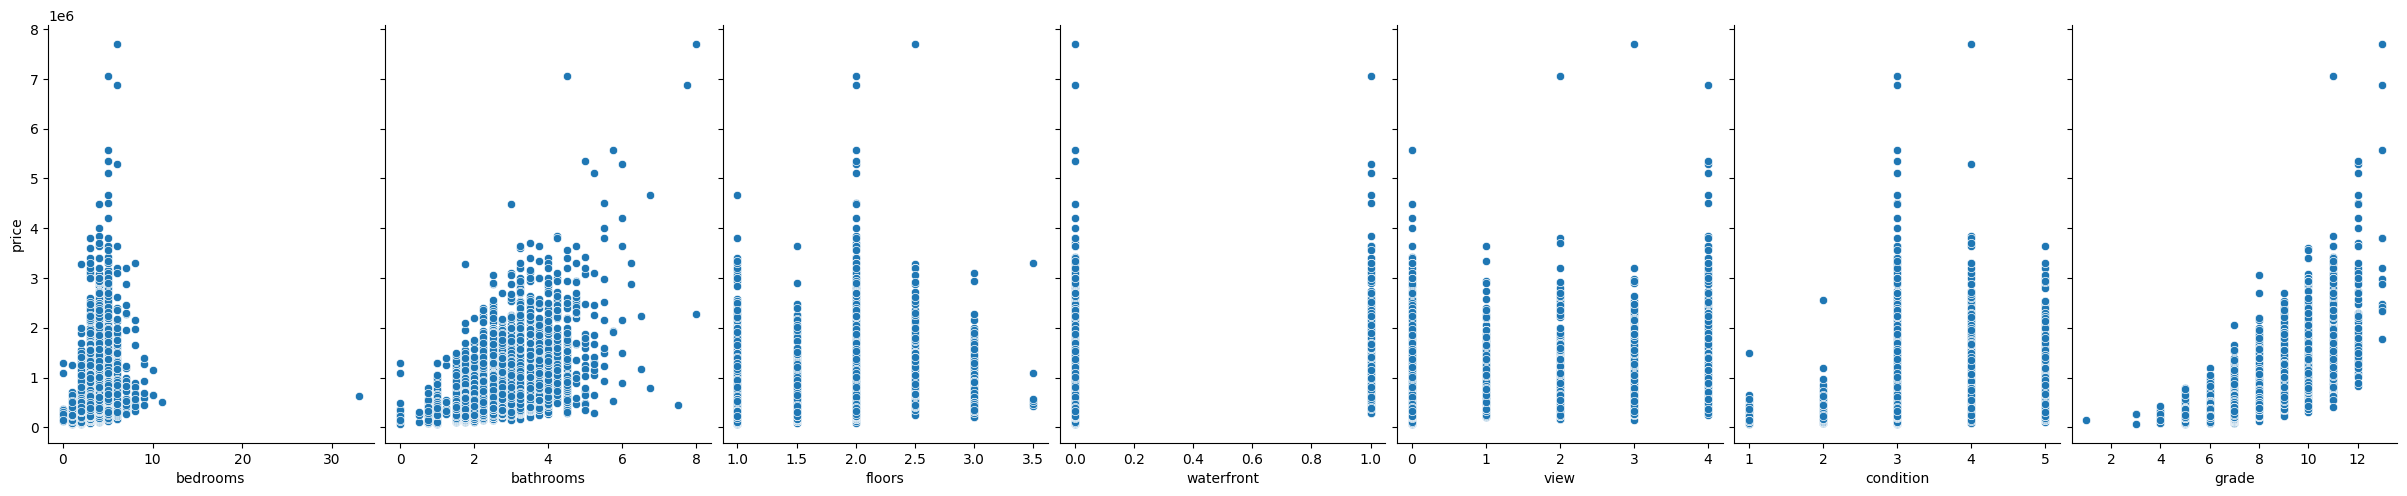

In [43]:
sns.pairplot(df, x_vars=house_features, y_vars='price', size=5, aspect=0.7)

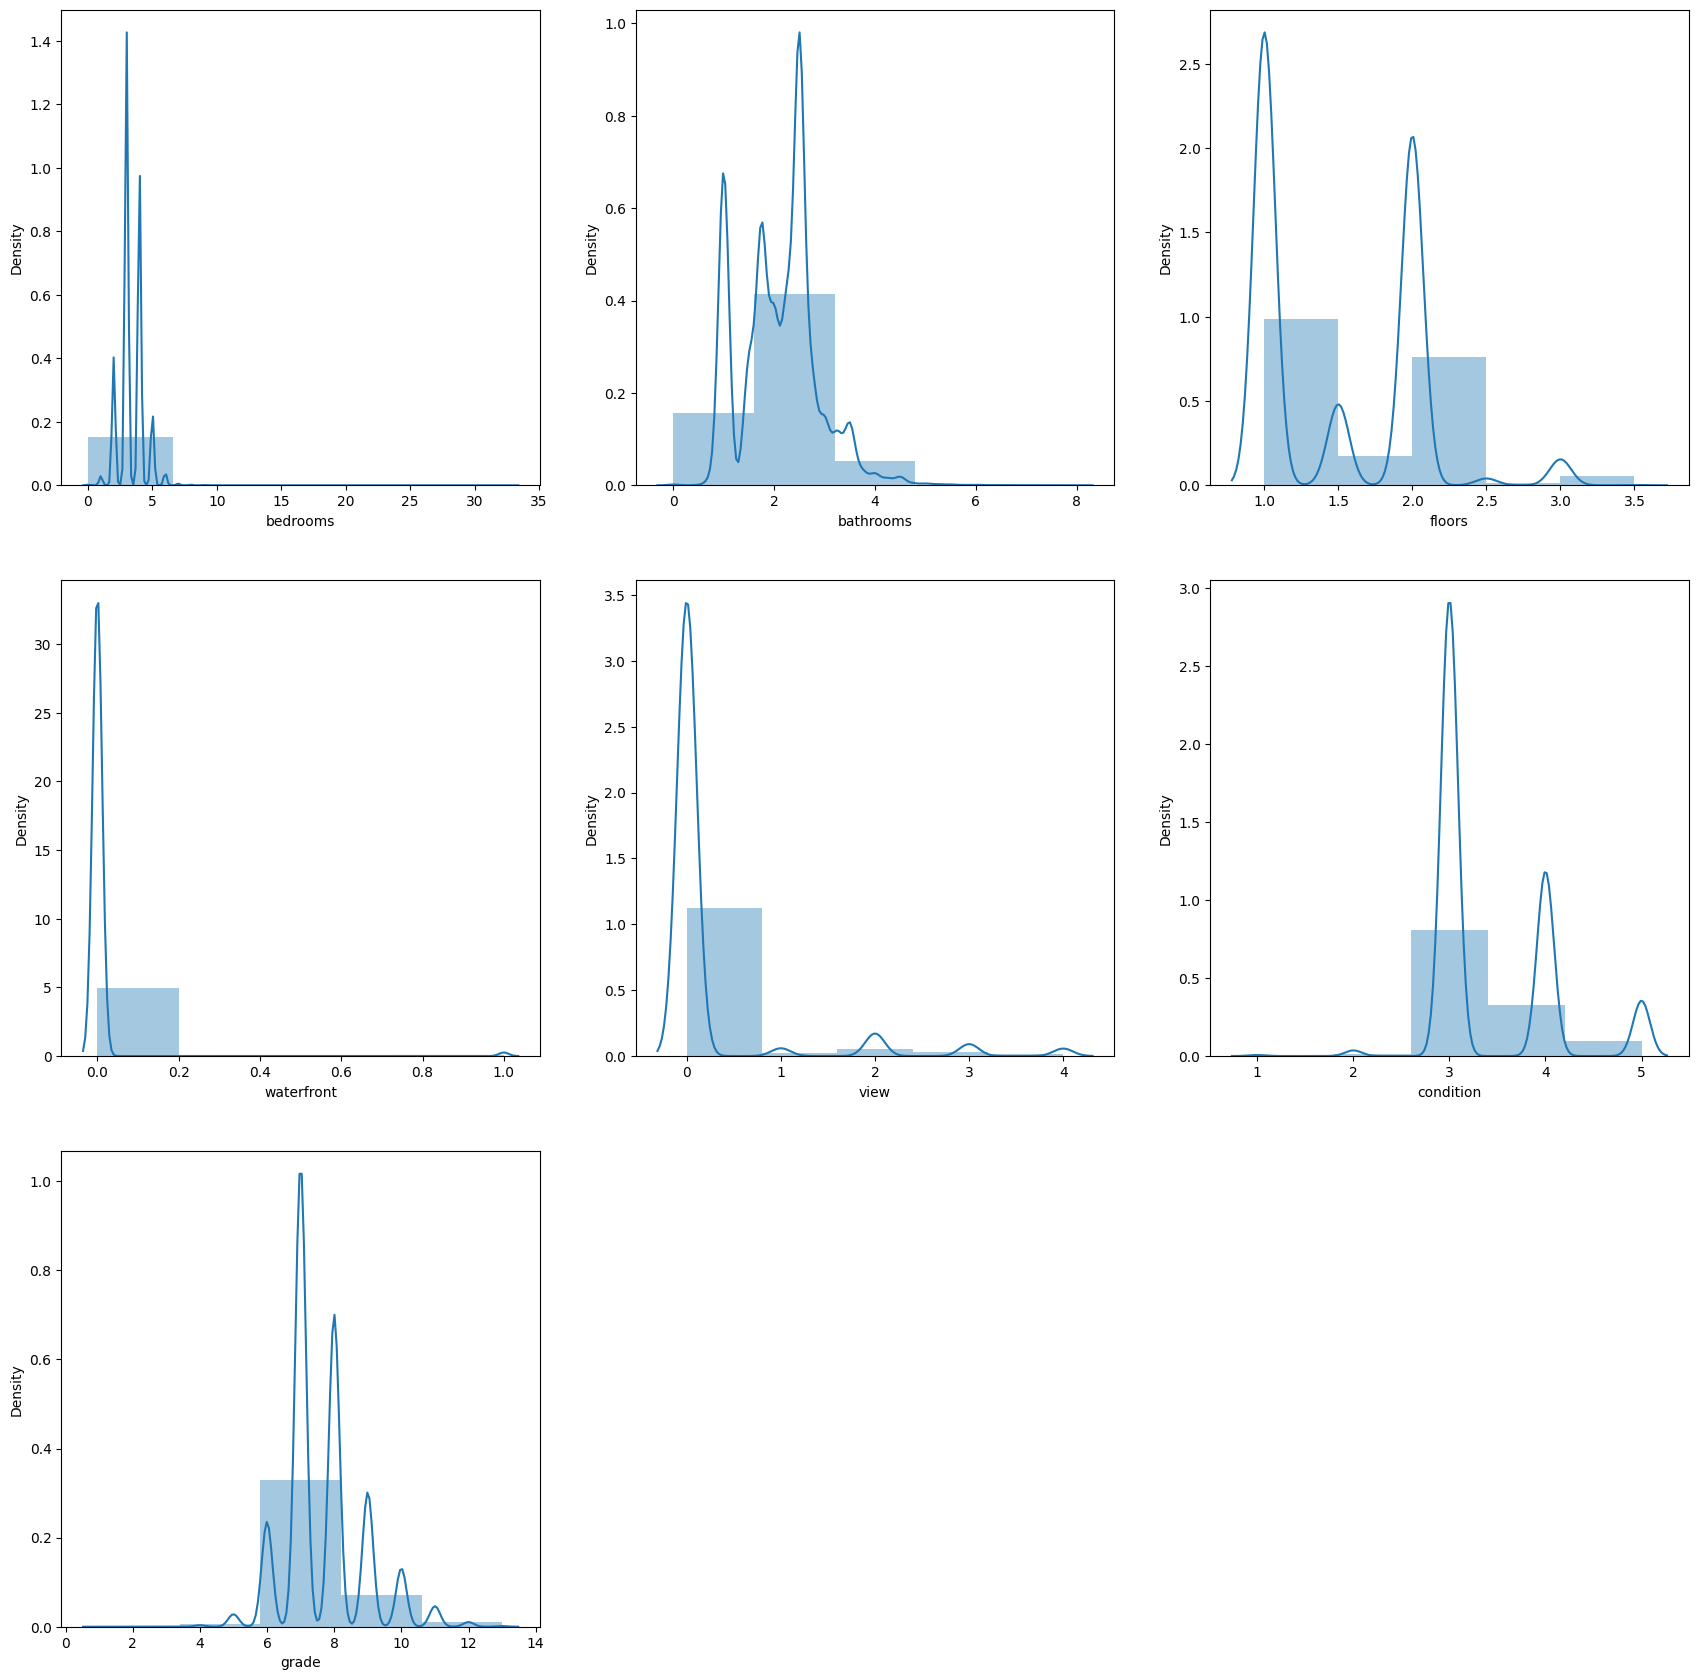

In [44]:
plt.figure(figsize=(21,21))
k=1
for feature in house_features:
  plt.subplot(3,3,k)
  sns.distplot(df[feature], bins=5, kde=True)
  k=k+1

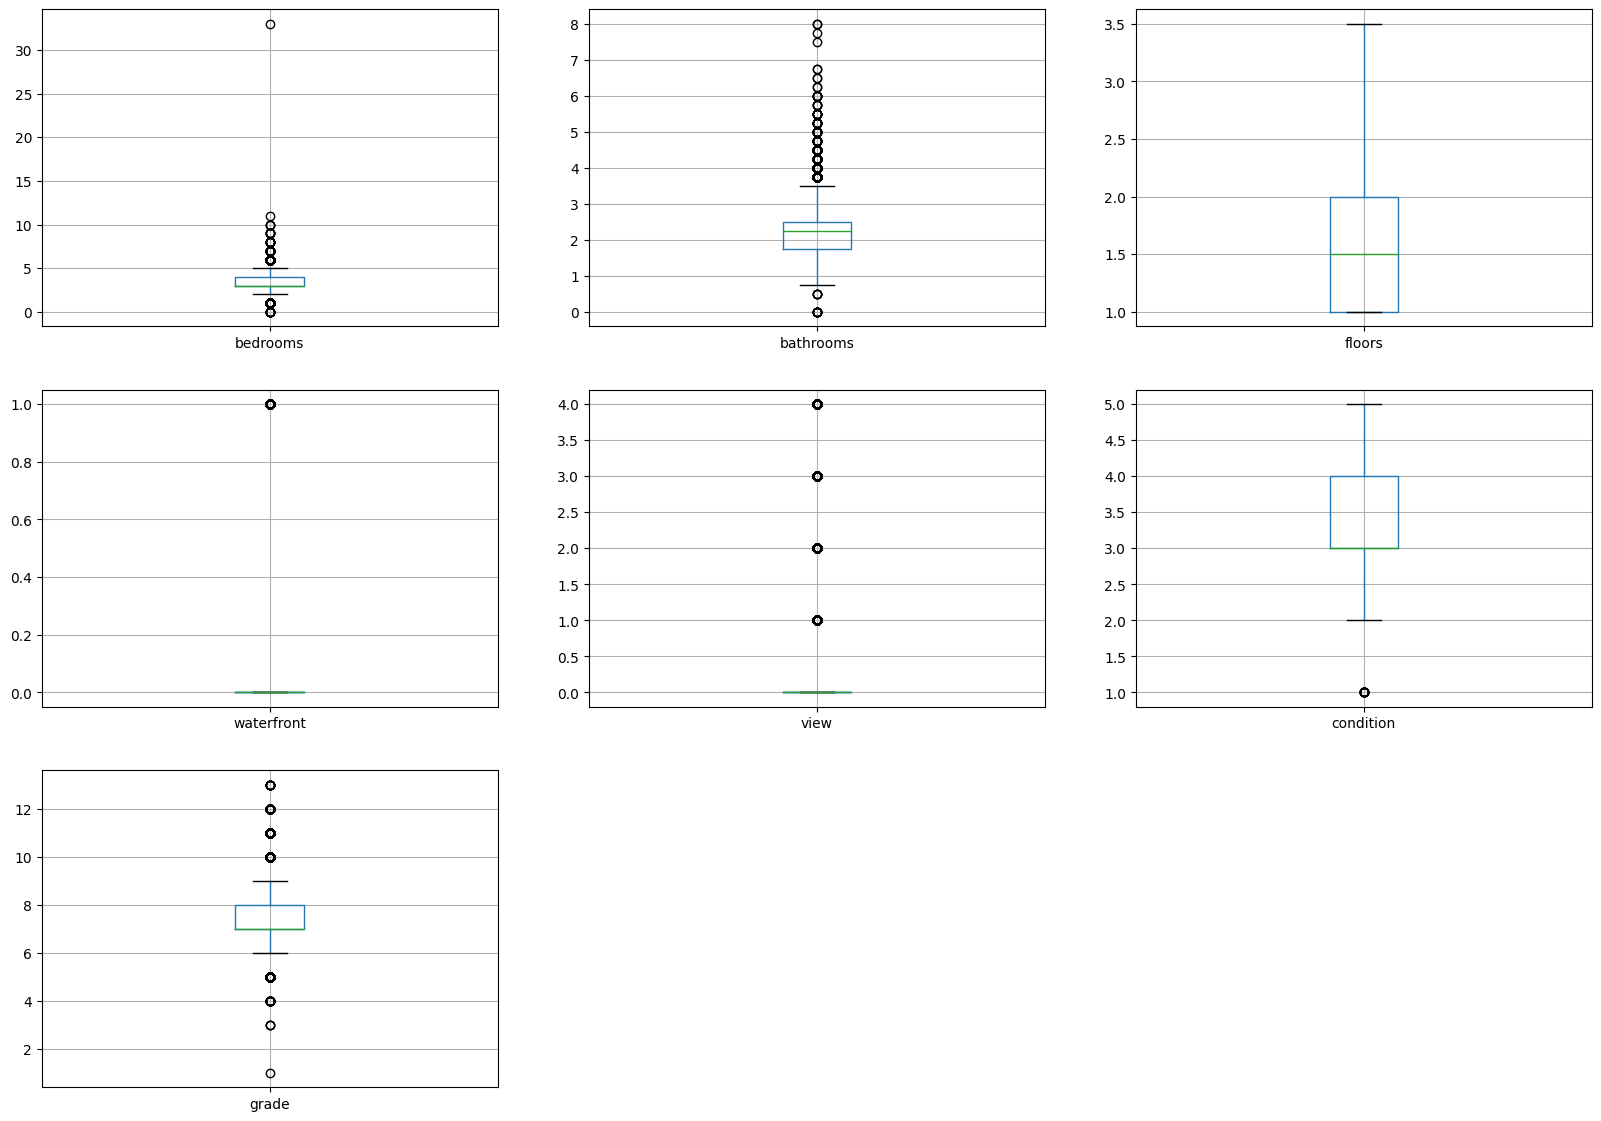

In [45]:
plt.figure(figsize=(20,14))
k=1
for feature in house_features:
  plt.subplot(3,3,k)
  df.boxplot(feature)
  k=k+1

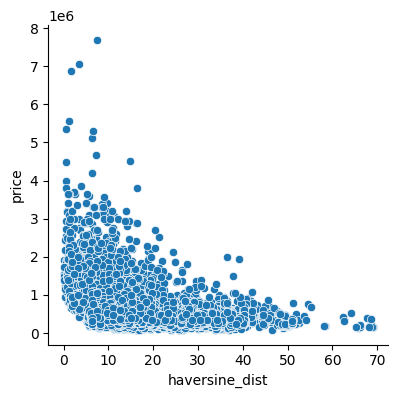

In [46]:
#check relation between haversine_dist
sns.pairplot(df, x_vars=['haversine_dist'], y_vars='price',size=4)

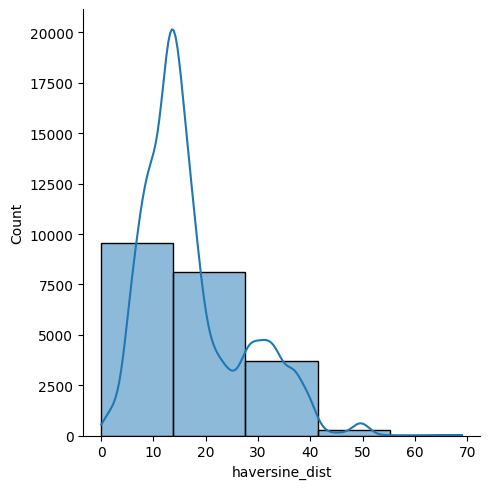

In [47]:
sns.displot(df['haversine_dist'],kde=True, bins=5)

<AxesSubplot: >

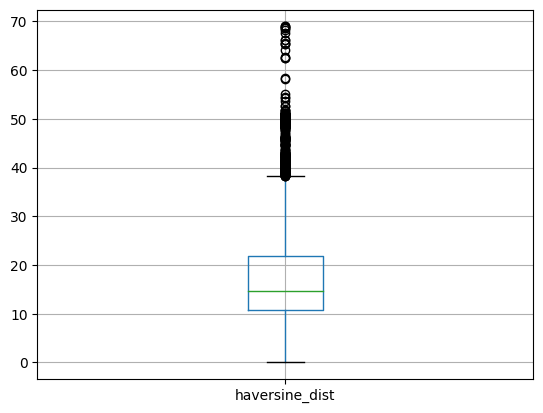

In [48]:
df.boxplot('haversine_dist')

<AxesSubplot: >

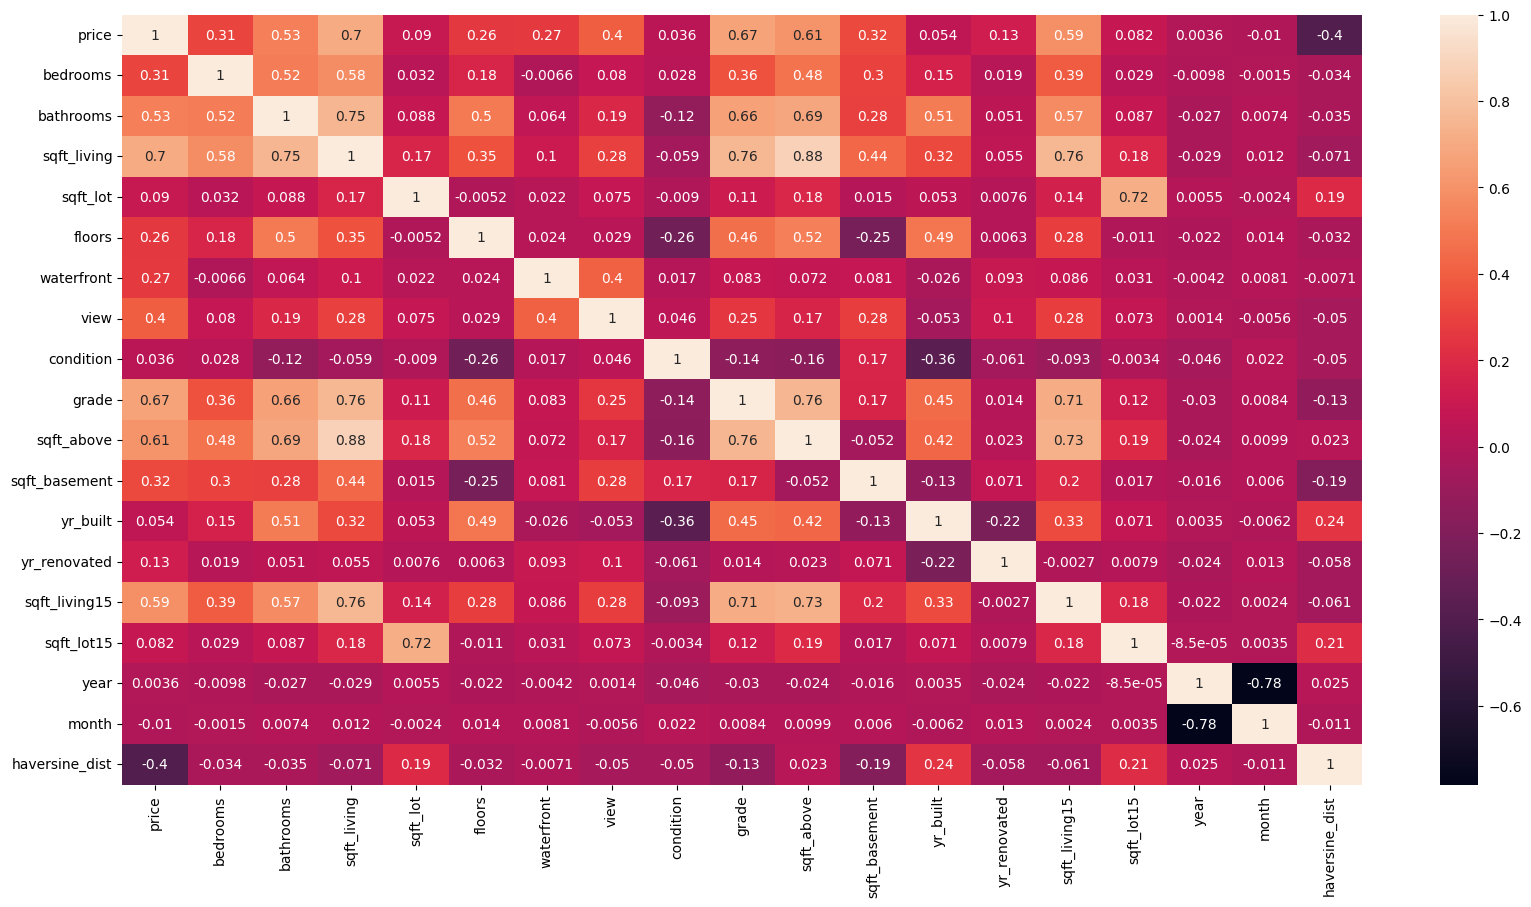

In [49]:
#check heatmap of data
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

from heatmap we can conclude that
1) bedrooms, floors, waterfront, view, sqft_basement are moderately correlated with price
2) bathrooms, sqft_living, grade, sqft_above, sqft_living15 are highly correlated with price
3) sqft_lot, condition, yr_built, yr_renovated, sqft_lot15, year, month have no or very slightly relation with price
4) haversine_dist have moderately negative correalted with price
5) bedrooms, bathrooms, grade, sqft_above, sqft_living15 have highly correalted with sqft_living
6) sqft_lot is highly correlated with sqft_lot15


In [50]:
# yr_built is greater than year sold means this data is wrong so replace yr_built data in this rows with year sold 
df[df['yr_built']>df['year']]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,month,haversine_dist
1763,597326.0,4,4.00,3570,8250,2.0,0,0,3,10,2860,710,2015,0,2230,10000,2014,6,4.698181
2687,385195.0,1,1.00,710,6000,1.5,0,0,3,6,710,0,2015,0,1440,4800,2014,10,8.470718
7526,614285.0,5,2.75,2730,6401,2.0,0,0,3,8,2730,0,2015,0,2520,6126,2014,12,17.169017
8039,455000.0,2,1.50,1200,1259,2.0,0,0,3,8,1000,200,2015,0,1320,1852,2014,6,5.934674
14489,500000.0,2,2.25,1570,1269,2.0,0,0,3,9,1280,290,2015,0,1570,6000,2014,8,12.481680
17098,350000.0,3,2.00,1380,3600,3.0,0,0,3,8,1380,0,2015,0,1480,3600,2014,6,6.180514
19805,455000.0,3,1.75,1320,1014,3.0,0,0,3,9,1320,0,2015,0,1380,1495,2014,8,6.258930
20770,357000.0,5,2.50,2990,9240,2.0,0,0,3,8,2990,0,2015,0,1970,18110,2014,8,16.029212
20852,595000.0,4,3.25,3730,4560,2.0,0,0,3,9,2760,970,2015,0,1800,4560,2014,7,9.766498
20963,230000.0,3,1.50,1040,1264,2.0,0,0,3,9,900,140,2015,0,1350,3000,2014,7,6.371107


In [51]:
df['yr_built'] = np.where(df['yr_built']>df['year'], df['year'], df['yr_built'])

In [52]:
df[df['yr_built']>df['year']]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,month,haversine_dist


In [53]:
# bedrooms feature has one extreme outlier, so we can trim this.
df = df[~(df['bedrooms']>11)]

In [54]:
# reset index
df.reset_index(drop=True, inplace=True)

In [55]:
# drop unwanted columns
df.drop(['sqft_lot15', 'month','year'],axis=1,inplace=True)

In [56]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,haversine_dist
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,12.413011
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,13.212016
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,13.071254
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,16.811236
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,13.512839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,12.611522
21608,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,15.985989
21609,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,6.272967
21610,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,15.135800


In [57]:
#spliting data into x and y
x=df.drop("price",axis=1)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,haversine_dist
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,12.413011
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,13.212016
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,13.071254
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,16.811236
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,13.512839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,12.611522
21608,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,15.985989
21609,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,6.272967
21610,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,15.135800


In [58]:
y=df[('price')].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

# Train Test Spliting

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [60]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17289, 15), (4323, 15), (17289,), (4323,))

# Treating Outliers

In [61]:
df.skew()

price              4.024034
bedrooms           0.518469
bathrooms          0.511043
sqft_living        1.471483
sqft_lot          13.059731
floors             0.616107
waterfront        11.384839
view               3.395652
condition          1.032873
grade              0.771033
sqft_above         1.446622
sqft_basement      1.578053
yr_built          -0.470012
yr_renovated       4.549373
sqft_living15      1.108134
haversine_dist     1.077140
dtype: float64

In [62]:
# using log Transform
ls = ['bedrooms', 'floors', 'waterfront', 'view', 'sqft_basement', 'haversine_dist', 'sqft_lot']

for i in ls:
  x_train[i] = np.log1p(x_train[i])
  x_test[i] = np.log1p(x_test[i])

In [63]:
def Outlier(df1, var):
  IQR = df1[var].quantile(0.75) - df1[var].quantile(0.25)
  Lower_Fence = df1[var].quantile(0.25) - (IQR * 3)
  Upper_Fence = df1[var].quantile(0.75) + (IQR * 3) 

  df1[var] = np.where(df1[var] > Upper_Fence, Upper_Fence, 
                      np.where(df1[var] < Lower_Fence, Lower_Fence, df1[var]))
  
  return df1[var]

In [64]:
ls2 = ['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']

for col in [x_train, x_test]:
  for i in ls2:
    Outlier(col, i)

In [65]:
x_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,haversine_dist
count,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000,17289.000000
mean,1.451628,2.116114,2078.474290,8.992165,0.892701,0.005412,0.117792,3.405634,7.655272,1787.845509,2.529481,1971.115970,84.753774,1989.178148,2.775895
std,0.213984,0.762492,899.433332,0.906493,0.209722,0.061012,0.364627,0.648936,1.158171,816.793287,3.171651,29.462466,402.533484,685.002241,0.537343
min,0.000000,0.000000,290.000000,6.350886,0.693147,0.000000,0.000000,1.000000,4.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,0.000000
25%,1.386294,1.750000,1420.000000,8.525360,0.693147,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,1490.000000,2.465067
50%,1.386294,2.250000,1920.000000,8.938663,0.916291,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,2.750604
75%,1.609438,2.500000,2550.000000,9.280519,1.098612,0.000000,0.000000,4.000000,8.000000,2217.000000,6.329721,1997.000000,0.000000,2363.000000,3.131137
max,2.397895,4.750000,5940.000000,14.317110,1.504077,0.693147,1.609438,5.000000,11.000000,5298.000000,8.480737,2015.000000,2015.000000,4982.000000,4.248342


In [66]:
x_test.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,haversine_dist
count,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.00000,4323.000000
mean,1.456626,2.098485,2065.895906,8.982078,0.887234,0.004490,0.109183,3.424242,7.637983,1778.245894,2.527653,1970.564654,83.015961,1973.63405,2.771275
std,0.209345,0.751581,881.423542,0.885423,0.208803,0.055610,0.352922,0.657414,1.148047,805.881500,3.166702,29.010684,398.332567,674.16102,0.530874
min,0.000000,0.000000,384.000000,6.255750,0.693147,0.000000,0.000000,1.000000,4.000000,384.000000,0.000000,1900.000000,0.000000,690.00000,0.117932
25%,1.386294,1.500000,1430.000000,8.525360,0.693147,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,1480.00000,2.469726
50%,1.386294,2.250000,1900.000000,8.936035,0.693147,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1973.000000,0.000000,1830.00000,2.746464
75%,1.609438,2.500000,2520.000000,9.259226,1.098612,0.000000,0.000000,4.000000,8.000000,2200.000000,6.311735,1996.000000,0.000000,2360.00000,3.115404
max,2.484907,5.500000,5790.000000,13.887104,1.504077,0.693147,1.609438,5.000000,11.000000,5200.000000,8.006701,2015.000000,2014.000000,5000.00000,4.208139


In [67]:
x_test.skew()

bedrooms          -0.614258
bathrooms          0.444597
sqft_living        1.128396
sqft_lot           0.867163
floors             0.389154
waterfront        12.308717
view               3.092389
condition          1.023704
grade              0.696176
sqft_above         1.236803
sqft_basement      0.483611
yr_built          -0.411984
yr_renovated       4.591163
sqft_living15      1.061505
haversine_dist    -0.362549
dtype: float64

In [68]:
x_train.skew()

bedrooms          -0.497290
bathrooms          0.332937
sqft_living        1.118372
sqft_lot           0.984767
floors             0.363493
waterfront        11.184643
view               2.943240
condition          1.035098
grade              0.664417
sqft_above         1.248458
sqft_basement      0.485045
yr_built          -0.484255
yr_renovated       4.539459
sqft_living15      1.068525
haversine_dist    -0.377663
dtype: float64

# Standard Scaling

In [69]:
# Scaling dataframe
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model Training

In [70]:
# Model training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Predicting test results

In [71]:
y_pred = model.predict(x_test)
y_pred

array([1139428.55085877,  327822.14467699,  858497.9562177 , ...,
       1015077.93482872,  346224.99209497,  791235.76897547])

In [72]:
# check actual vs predict values
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1139428.55  900000.  ]
 [ 327822.14  405000.  ]
 [ 858497.96  780000.  ]
 ...
 [1015077.93  600000.  ]
 [ 346224.99  382500.  ]
 [ 791235.77  739000.  ]]


In [73]:
y_test

array([900000., 405000., 780000., ..., 600000., 382500., 739000.])

In [74]:
model.score(x_train, y_train)

0.7398146965355324

In [75]:
model.score(x_test, y_test)

0.7431151973423387

In [76]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

def regression_results(y_true, y_pred):

    #Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_test)
    meadian_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_error: ', mean_squared_error(y_test,y_pred))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MAPE: ', round(mean_absolute_percentage_error(y_test, y_pred),4))
    print('Adjusted r2: ', round(1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),3))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [77]:
regression_results(y_test, y_pred)

explained_variance:  0.7431
mean_squared_error:  32623459505.177814
r2:  0.7431
MAE:  115246.108
MAPE:  0.2448
Adjusted r2:  0.742
MSE:  32623459505.1778
RMSE:  180619.6543


In [78]:
# mean of residuals
residuals = y_test-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -691.5870934441892


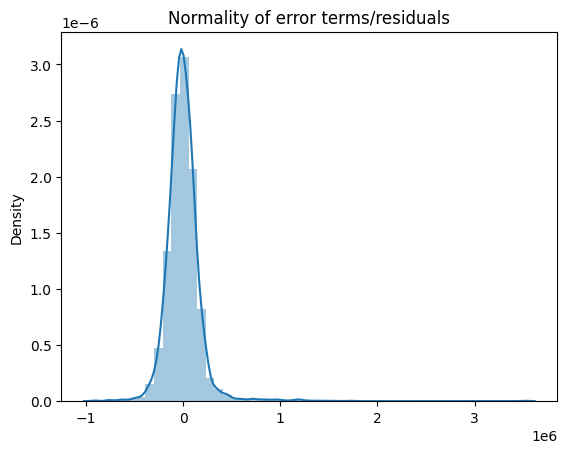

In [79]:
#Normality check
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

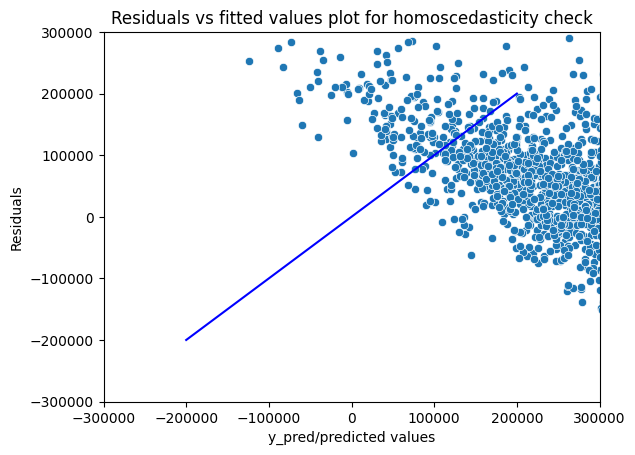

In [80]:
# homoscedasticity check
p = sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-300000,300000)
plt.xlim(-300000,300000)
p = sns.lineplot(x=[-200000,200000], y=[-200000,200000], color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

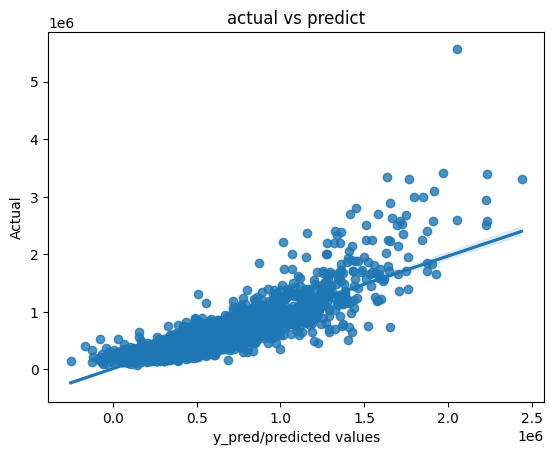

In [81]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Actual')
plt.title('actual vs predict')
plt.show()